# 🟦 多項式回帰

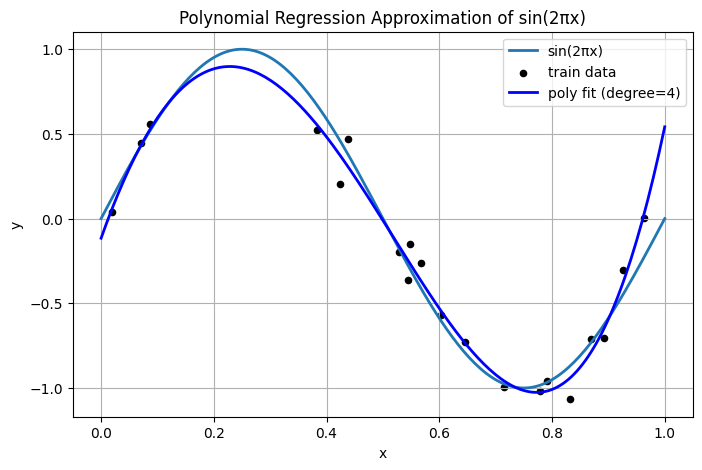

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# ---- 1. 訓練データ作成 ----
np.random.seed(0)
N_train = 20
sigma = 0.1

train_x = np.random.rand(N_train)
train_y = np.sin(2*np.pi*train_x) + np.random.normal(0, sigma, N_train)

# ---- 2. 多項式特徴量の生成 ----
m = 4  # 4次多項式
poly = PolynomialFeatures(degree=m, include_bias=False)
X_train = poly.fit_transform(train_x.reshape(-1,1))

# ---- 3. 多項式回帰モデル学習 ----
model = LinearRegression()
model.fit(X_train, train_y)

# ---- 4. テストデータ生成 & 予測 ----
N_test = 200
test_x = np.linspace(0, 1, N_test)
X_test = poly.transform(test_x.reshape(-1,1))
test_y = model.predict(X_test)

# ---- 5. プロット ----
plt.figure(figsize=(8,5))
# 真の関数
plt.plot(test_x, np.sin(2*np.pi*test_x), label="sin(2πx)", linewidth=2)
# 訓練データ
plt.scatter(train_x, train_y, color="black", s=20, label="train data")
# 予測曲線
plt.plot(test_x, test_y, color="blue", label="poly fit (degree=4)", linewidth=2)

plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title("Polynomial Regression Approximation of sin(2πx)")
plt.grid(True)
plt.show()


### 🟠 PolynomialFeaturesとは何か

* 入力された一次元または多次元の特徴量を、多項式の形に拡張するための前処理
* x を受け取り、x, x², x³,… といった新しい特徴量を自動生成する
* scikit-learn の前処理クラスで、線形回帰と組み合わせて多項式回帰を実現する


引数

* degree
  * 生成する多項式の次数
* include_bias
  * 切片項を含めるかどうか
* interaction_only
  * 交差項のみを作るかどうか
* order
  * 多項式を生成する順序の指定（rareに使う）


返り値

* fit_transform後に返るのは多項式化された特徴量行列
  * 例：入力が [x] で degree=3 のとき
    [x, x², x³]
  * 例：入力が [x1, x2] で degree=2 のとき
    [x1, x2, x1², x1x2, x2²]


### 🟠 普通の回帰分析との違い

* 普通の回帰分析
  * そのままの特徴量に対して線形モデルを当てはめる
* 多項式回帰（PolynomialFeaturesを使う場合）
  * 特徴量を人工的に増やし、非線形の形状を線形モデルで表現できるようにする
* 違いの本質
  * 元の線形回帰モデル自体は線形のまま
  * 特徴量を多項式化することで、結果的に非線形の関数形を近似できるようになる
